In [1]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('quantumCartPole-v1')

## Boxplots

In [2]:
import numpy as np
import matplotlib.pyplot as plt

best_episodes = episodes.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()
best_episodes = pd.merge(best_episodes, episodes, on=['trial_id', 'evaluation_score'], how='left')

# List of hyperparameters and their unique values
hyperparameters = [
    ('Num Layers', 'layers', np.sort(episodes['layers'].unique())),
    ('Entanglements', 'entanglements', np.sort(episodes['entanglements'].unique())),
    ('Learning Rate', 'learning_rate', np.sort(episodes['learning_rate'].unique())),
    ('Number of Weights', 'number_of_weights', np.sort(episodes['number_of_weights'].unique())),
]

# Create individual box plots for each hyperparameter configuration
for title, column, values in hyperparameters:
    fig, ax = plt.subplots()
    ax.boxplot([best_episodes[best_episodes[column] == v]['evaluation_score'] for v in values])
    ax.set_xticklabels(values)
    ax.set_xlabel(title)
    ax.set_ylabel('Evaluation Score')

    # Save the figure with a reasonable name starting with 'quantum'
    fig.savefig(f'plots\quantum_{column}_sensitivity.png')
    plt.close(fig)
    plt.show()


## Heatmaps

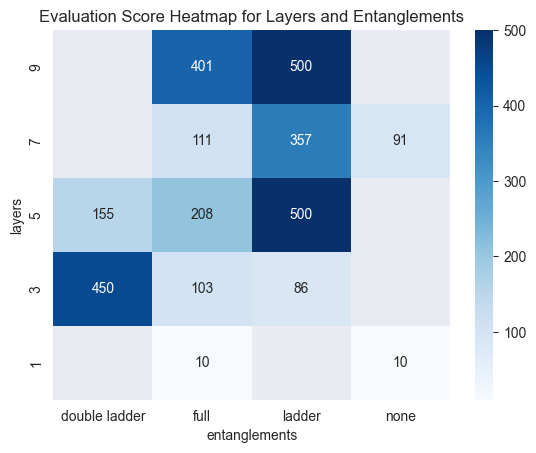

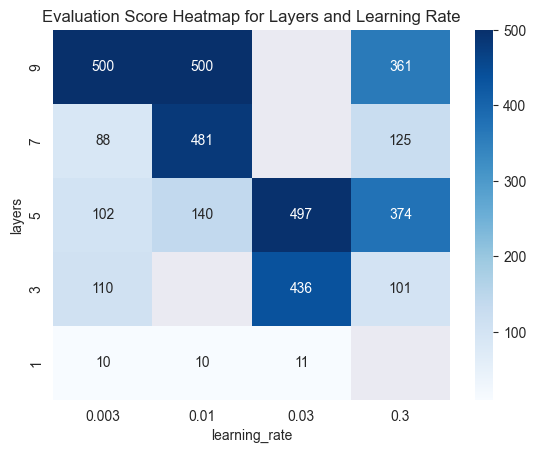

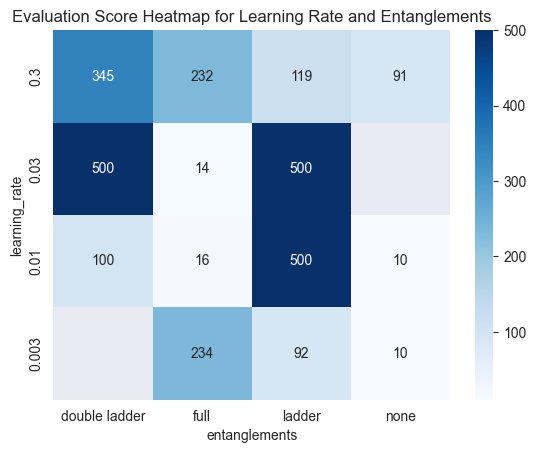

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

best_episodes = episodes.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()
best_episodes = pd.merge(best_episodes, episodes, on=['trial_id', 'evaluation_score'], how='left')

# List of heatmap configurations
heatmaps = [
    ('Layers and Entanglements', 'layers', 'entanglements', 'layers_entanglements'),
    ('Layers and Learning Rate', 'layers', 'learning_rate', 'layers_lr'),
    ('Learning Rate and Entanglements', 'learning_rate', 'entanglements', 'lr_entanglements'),
]

for title, row_col, col_col, filename in heatmaps:
    # Create a pivot table
    pivot_table = best_episodes.pivot_table(index=row_col, columns=col_col, values='evaluation_score', aggfunc='mean')

    # Create a heatmap
    fig, ax = plt.subplots()
    sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.0f', ax=ax).invert_yaxis()
    ax.set_title(f'Evaluation Score Heatmap for {title}')

    # Save the figure with a reasonable name starting with 'quantum'
    fig.savefig(f'plots/quantum_{filename}_heatmap.png')
    plt.show()
    plt.close(fig)


## Scatterplots

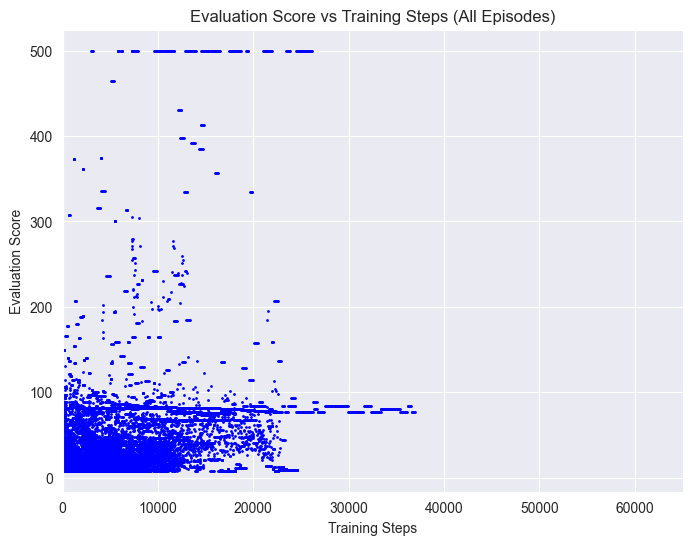

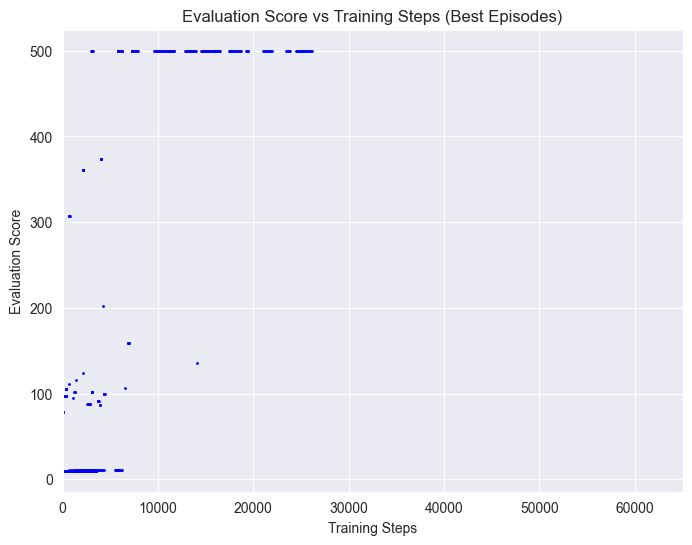

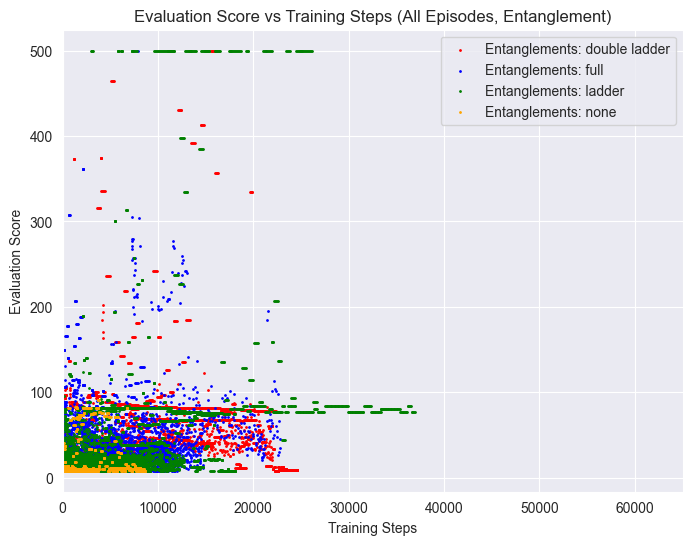

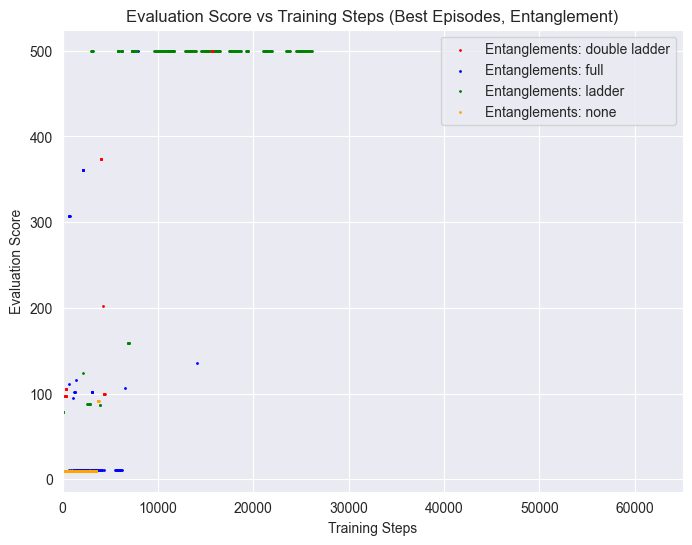

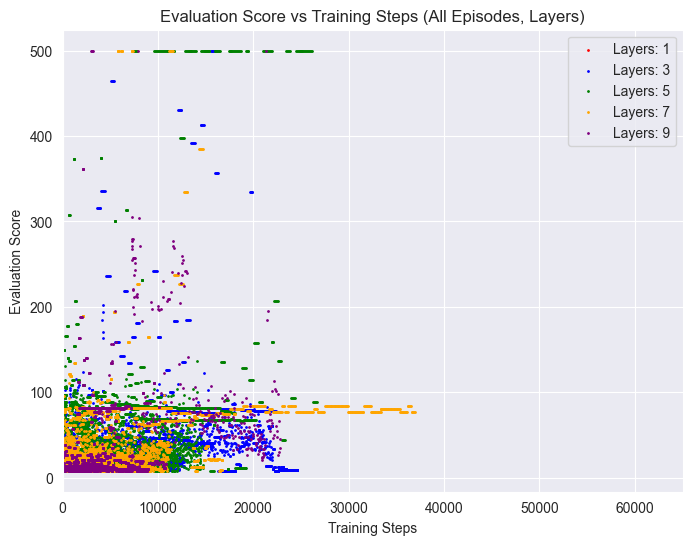

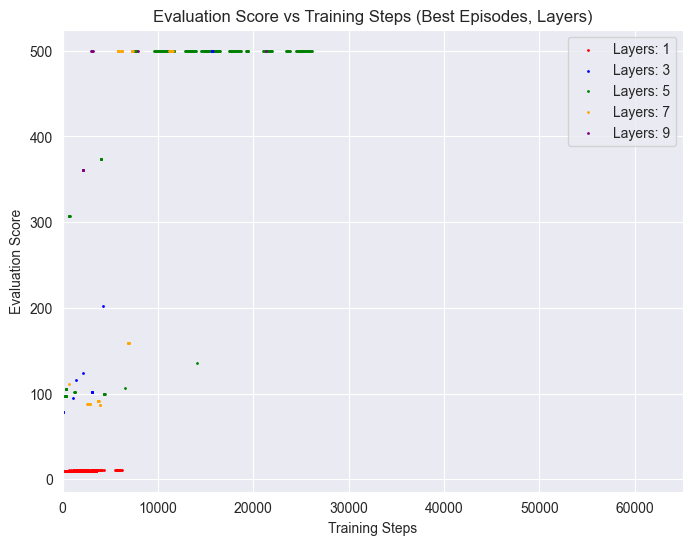

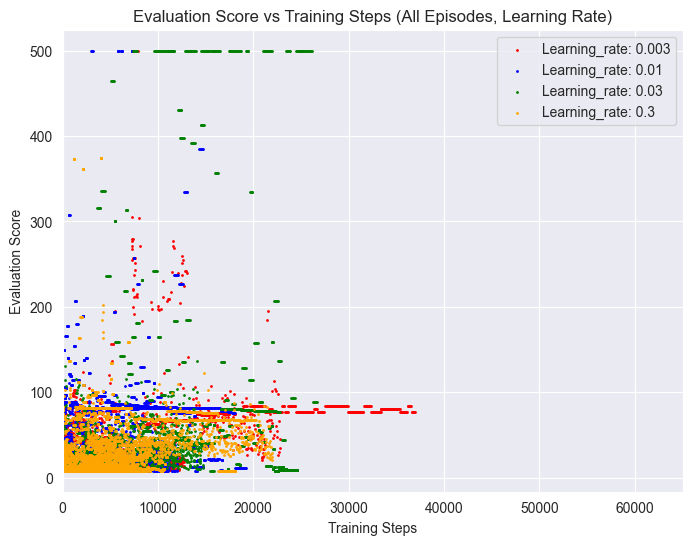

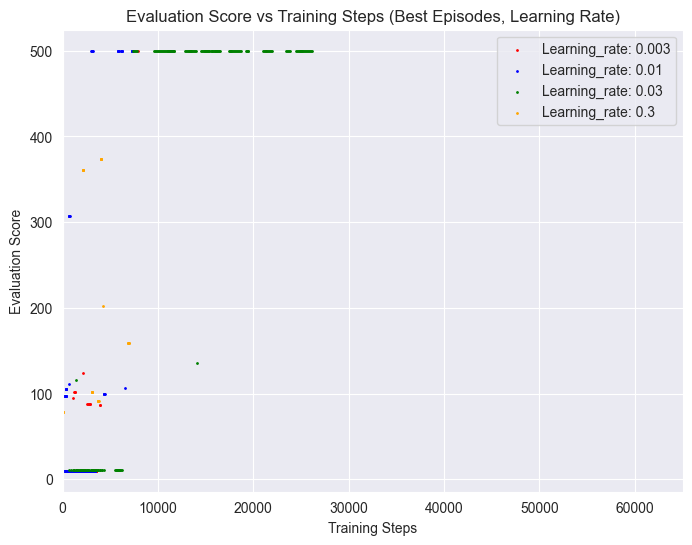

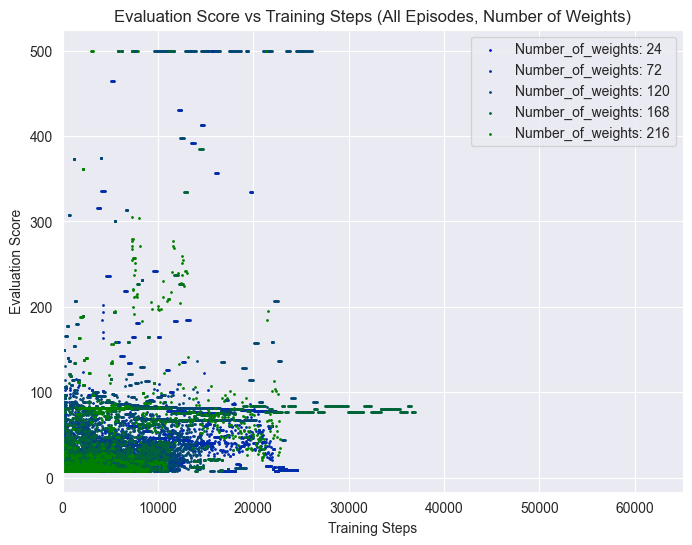

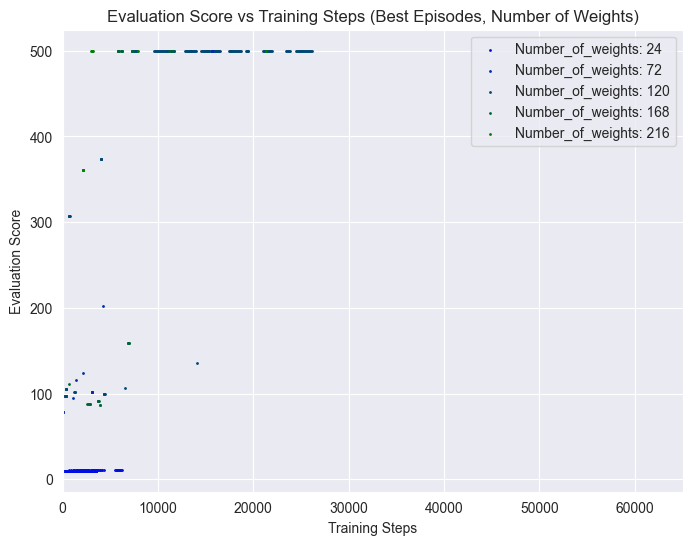

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_episodes(df, title, filename, grouping):
    if grouping not in ['layers', 'learning_rate', 'entanglements', 'number_of_weights', 'neurons', 'none']:
        raise ValueError(f"Unknown grouping: {grouping}")

    fig, ax = plt.subplots(figsize=(8, 6))

    if grouping == 'none':
        ax.scatter(df['training_steps_cumsum'], df['evaluation_score'], s=1, color='blue')
    else:
        unique_values = sorted(df[grouping].unique())
        if grouping == 'number_of_weights':
            cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue", "green"])
            colors = [cmap(float(value) / max(unique_values)) for value in unique_values]
        else:
            colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

        for value, color in zip(unique_values, colors):
            scatter_data = df[df[grouping] == value]
            ax.scatter(scatter_data['training_steps_cumsum'], scatter_data['evaluation_score'], s=1, color=color,
                       label=f"{grouping.capitalize()}: {value}")

    ax.set_xlabel('Training Steps')
    ax.set_ylabel('Evaluation Score')
    ax.set_xlim(0, 65000)
    ax.set_title(title)

    if grouping != 'none':
        ax.legend()

    plt.savefig(filename, dpi=300)
    plt.show()


# Call the function with the 'episodes' dataframe without grouping
plot_episodes(episodes, "Evaluation Score vs Training Steps (All Episodes)",
              "plots/quantum_all_episodes_no_grouping.png", 'none')

# Call the function with the 'best_episodes' dataframe without grouping
plot_episodes(best_episodes, "Evaluation Score vs Training Steps (Best Episodes)",
              "plots/quantum_best_episodes_no_grouping.png", 'none')

# Call the function with the 'episodes' dataframe for entanglement
plot_episodes(episodes, "Evaluation Score vs Training Steps (All Episodes, Entanglement)",
              "plots\quantum_entanglement_comparison_all_episodes.png", 'entanglements')

# Call the function with the 'best_episodes' dataframe for entanglement
plot_episodes(best_episodes, "Evaluation Score vs Training Steps (Best Episodes, Entanglement)",
              "plots\quantum_entanglement_comparison_best_episodes.png", 'entanglements')

# Call the function with the 'episodes' dataframe for layers
plot_episodes(episodes, "Evaluation Score vs Training Steps (All Episodes, Layers)",
              "plots\quantum_layers_comparison_all_episodes.png", 'layers')

# Call the function with the 'best_episodes' dataframe for layers
plot_episodes(best_episodes, "Evaluation Score vs Training Steps (Best Episodes, Layers)",
              "plots\quantum_layers_comparison_best_episodes.png", 'layers')

# Call the function with the 'episodes' dataframe for learning rate
plot_episodes(episodes, "Evaluation Score vs Training Steps (All Episodes, Learning Rate)",
              "plots\quantum_learning_rate_comparison_all_episodes.png", 'learning_rate')

# Call the function with the 'best_episodes' dataframe for learning rate
plot_episodes(best_episodes, "Evaluation Score vs Training Steps (Best Episodes, Learning Rate)",
              "plots\quantum_learning_rate_comparison_best_episodes.png", 'learning_rate')

# Call the function with the 'episodes' dataframe for number of weights
plot_episodes(episodes, "Evaluation Score vs Training Steps (All Episodes, Number of Weights)",
              "plots\quantum_weights_comparison_all_episodes.png", 'number_of_weights')

# Call the function with the 'best_episodes' dataframe for number of weights
plot_episodes(best_episodes, "Evaluation Score vs Training Steps (Best Episodes, Number of Weights)",
              "plots\quantum_weights_comparison_best_episodes.png", 'number_of_weights')
